In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pygmt

In [11]:
path_to_files = '/Users/sydneydybing/StrainProject/2024/'

earthquakes = pd.read_csv(path_to_files + 'NA_catalog_color_by_pattern.csv', dtype = str)

In [12]:
earthquakes.iloc[[0]]

,time,latitude,longitude,depth,mag,magType,fastgrowth,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-13T15:54:53.808Z,49.215,-129.6178,7,6,mww,a,54,1.719,0.65,...,2023-06-17T21:36:51.040Z,NaN,earthquake,5.71,1.776,0.032,96,reviewed,us,us


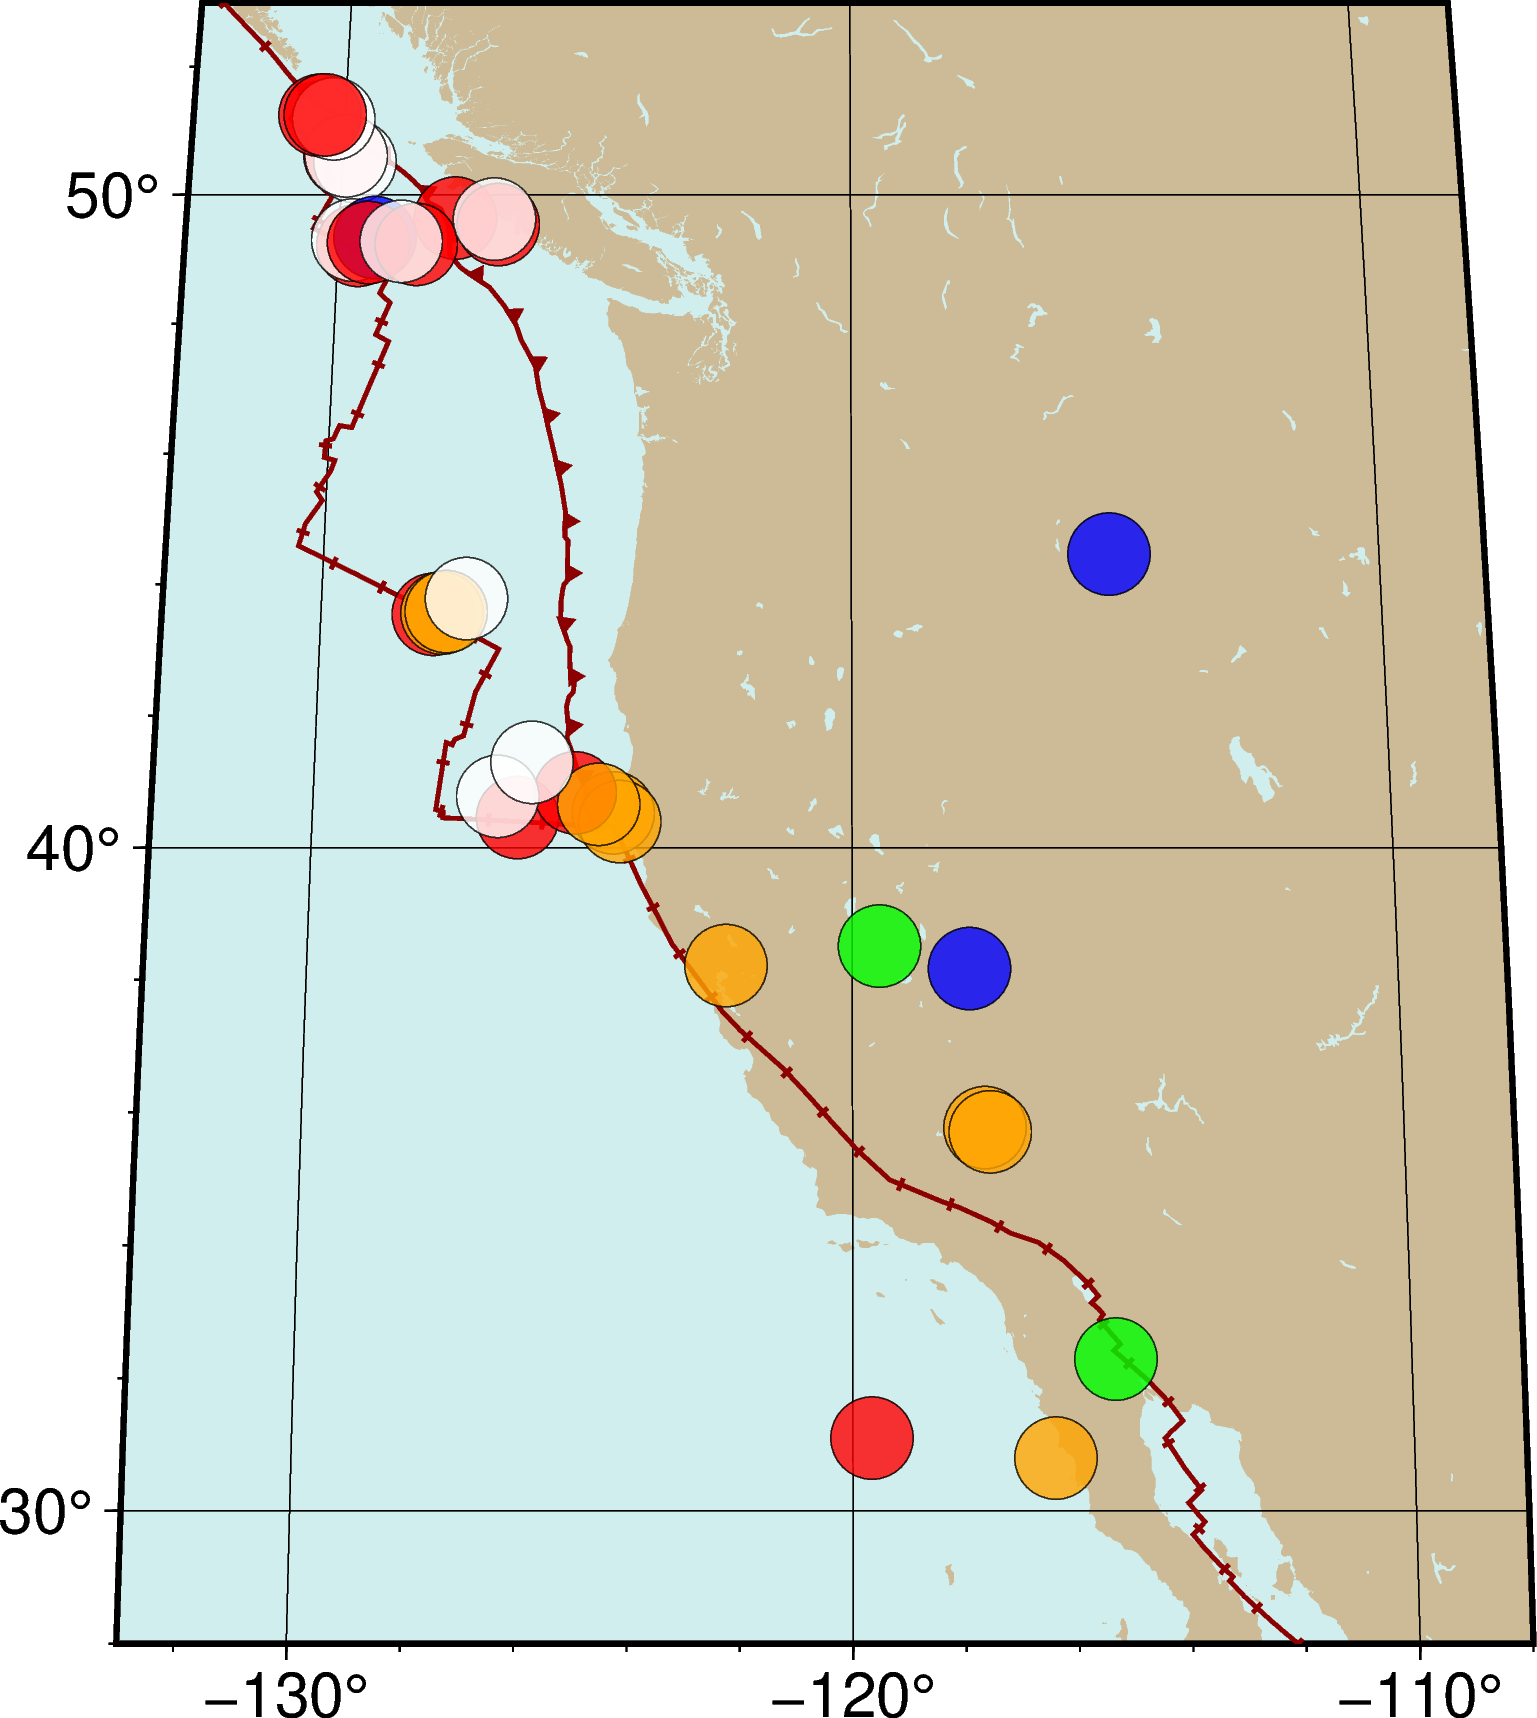

In [13]:
# Plot

pygmt.config(COLOR_BACKGROUND = 'white')

fig = pygmt.Figure()

# North America

region = [-133,-108,28,53]
fig.coast(region = region, projection = 'N12c', land = 'wheat3', water = 'lightcyan2', frame = 'afg') # Coastline
fig.plot(data = path_to_files + 'PB2002_boundaries.gmt', pen = '1p,darkred', style = 'f0.25/3p', fill = 'darkred') # Plate boundaries

# Plot earthquakes colored by good growth pattern or not

for idx in range(len(earthquakes)):
    
    lon = float(earthquakes['longitude'].values[idx])
    lat = float(earthquakes['latitude'].values[idx])
    pattern = earthquakes['fastgrowth'].values[idx]
    
    if pattern == 'a':
        color = 'red'
    elif pattern == 's':
        color = 'orange'
    elif pattern == 'm':
        color = 'green'
    elif pattern == 'n':
        color = 'blue'
    elif pattern == 'na':
        color = 'white'
    
    fig.plot(x = lon, y = lat, style = 'c0.7c', fill = color, pen = 'black', transparency = 20)

# Show or save 

fig.show();

# fig.savefig(path + 'figures/NA_earthquake_station_map_fmscoloredbymag.pdf');